In [25]:
import numpy as np
from tqdm import tqdm
from multiprocessing import Pool
import matplotlib
from matplotlib import pyplot as plt
plt.rc('font', size=30)          # controls default text sizes
plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
plt.rc('ytick', labelsize=30)    # fontsize of the tick labels
plt.rc('legend', fontsize=30)    # legend fontsize
plt.rc('lines', markersize = 10)

matplotlib.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"]= 10,8
plt.rcParams['figure.dpi'] = 70
matplotlib.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.grid.which'] = "both"
props = dict(boxstyle='round', alpha=0.01)

In [26]:
def rg(J,Dj,rho,K,deltaD):
    if K == 1:
        return J**2 * rho * deltaD / (Dj - J/4)
    else:
        return J**2 * rho * deltaD * (1 - J*rho*K/2) / (Dj - J/4)

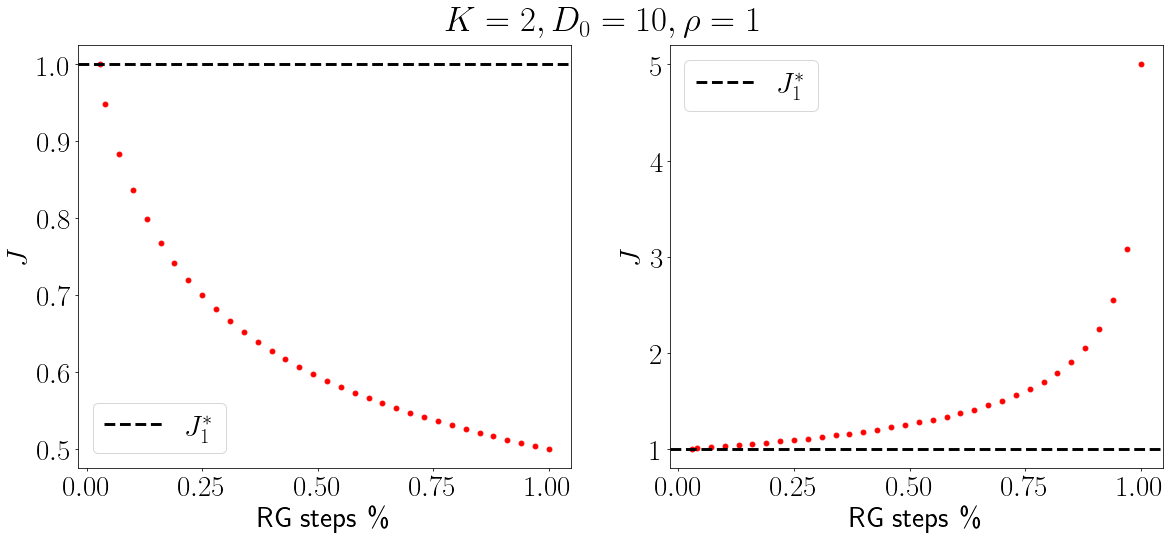

In [29]:
fig, ax = plt.subplots(1,2,figsize=(20,8))
D0 = 10
deltaD = 0.1
rho = 1
K = 2
D_range = np.arange(D0, 0, -deltaD)
J = 1/(K*rho)
y = []
x = []
for Dj in D_range:
    sig_num = 1 - J*rho*K/2
    y.append(J)
    x.append(Dj/D0)
    J += rg(J,Dj,rho,K,deltaD)
    if sig_num * (1 - J*rho*K/2) <= 0:
        ax[0].scatter(Dj/D0, 2/(K*rho), marker=".", color='r')
        break

ax[0].scatter(x[::3], y[::3], marker=".", color='r')
ax[0].axhline(2/(K*rho), 0, 1, ls="--", color="black", label=r"$J_1^*$")
ax[0].set_xlabel(r"RG steps \%")
ax[0].set_ylabel(r"$J$")
ax[0].legend()


J = 10/(K*rho)
y = []
x = []
for Dj in D_range:
    sig_num = 1 - J*rho*K/2
    y.append(J)
    x.append(Dj/D0)
    J += rg(J,Dj,rho,K,deltaD)
    if sig_num * (1 - J*rho*K/2) <= 0:
        ax[1].scatter(Dj/D0, 2/(K*rho), marker=".", color='r')
        break
        
ax[1].scatter(x[::3], y[::3], marker=".", color='r')
ax[1].axhline(2/(K*rho), 0, 1, ls="--", color="black", label=r"$J_1^*$")
ax[1].set_xlabel(r"RG steps \%")
ax[1].set_ylabel(r"$J$")
ax[1].legend()
plt.suptitle(r"$K={}, D_0 = {}, \rho={}$".format(K, D0, rho), y=0.95)
plt.savefig("rg_flow_K=2.pdf", bbox_inches='tight')
plt.show()

In [4]:
deltaD = 0.01

def get_min_rho(D0):
    rho = 0
    while True:
        rho += 0.01
        J = D0/50
        nj = rho * deltaD
        D = np.arange(D0, 0, -deltaD)
        for Dj in D:
            sig_den = Dj - J/4
            sig_num = 1 - J*rho*K/8
            J += rg(J,Dj,rho,K,deltaD)
            if sig_den * (Dj - J/4) <= 0:
                break
            elif sig_num * (1 - J*rho*K/8) <= 0:
                return rho


K = 2
D_range = 10**np.linspace(0,6,20)
# rho_min = np.array(list(tqdm(Pool().imap(get_min_rho, D_range), total=len(D_range))))
plt.plot(D_range[:8], rho_min[:8], marker=".", color="r")
plt.plot(D_range[6:-1][::3], rho_min[6:-1][::3], marker=".", color="r")
plt.xlabel(r"$D_0$")
plt.ylabel(r"$\rho_\mathrm{min}$", color="r")
plt.title(r"$J_0 = D_0/50, \Delta D = {}, K = {}$".format(deltaD, K))
J1 = 1/(rho_min*K)
ax2 = plt.gca().twinx()
ax2.plot(D_range[::3], J1[::3]/D_range[::3], marker=".", color="b")
ax2.set_ylabel(r"$J_1^* / D_0$", color="b")
ax2.set_xlabel(r"$D_0$")
ax2.set_xscale("log")
plt.savefig("rhomin_D.pdf", bbox_inches="tight")
plt.show()

NameError: name 'rho_min' is not defined

In [5]:
def rg1(Jp,Jm,Dj,rho,K,deltaD):
    delta1 = Jp**2 * rho / (Dj - Jp/4)
    delta1 -= (rho**2 * Jp / 2) * ((K-1)*Jp**2 / (Dj - Jp/4) + Jm**2 / (Dj - Jm/4))
    return delta1


def rg2(Jp,Jm,Dj,rho,K,deltaD):
    delta2 = Jm**2 * rho / (Dj - Jm/4)
    delta2 -= (rho**2 * Jm / 2) * ((K-1)*Jp**2 / (Dj - Jp/4) + Jm**2 / (Dj - Jm/4))
    return delta2

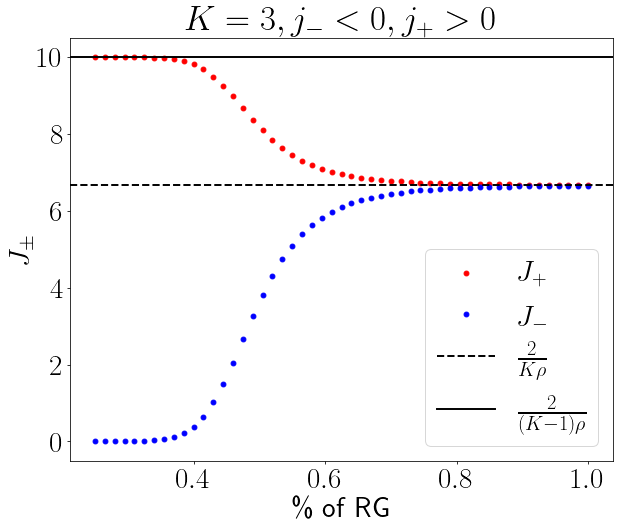

In [24]:
D0 = 20
deltaD = 0.1
rho = 0.1
K = 3
D_range = np.arange(D0, 0, -deltaD)
Jstar = 2/(K*rho)
deltaJ = 0.01
# print (Jstar, Jstar*K/(K-1))
Jp = Jstar + deltaJ
Jm = Jstar - deltaJ
y1 = []
y2 = []
x = []
for Dj in D_range:
    # print (Jp, Jm)
    x.append(Dj/D0)
    y1.append(Jp)
    y2.append(Jm)
    deltap = rg1(Jp,Jm,Dj,rho,K,deltaD)
    deltam = rg2(Jp,Jm,Dj,rho,K,deltaD)
    if Jp * (Jp + deltap) < 0 or  Jm * (Jm + deltam) < 0 or abs(deltap * deltam) < 1e-10:
        # print (Jp + deltap, Jm + deltam)
        break
    Jp += deltap
    Jm += deltam
    
plt.scatter(x[::3], y1[::3], marker=".", color='r', label=r"$J_+$")
plt.scatter(x[::3], y2[::3], marker=".", color='b', label=r"$J_-$")
plt.axhline(2/(K*rho), 0, 1, lw=2, ls="--", color="black", label=r"$\frac{2}{K \rho}$")
plt.axhline(2/((K-1)*rho), 0, 1, lw=2, color="black", label=r"$\frac{2}{(K-1)\rho}$")
plt.title(r"$K={}, j_-<0,j_+>0$".format(K))
plt.xlabel("\% of RG")
plt.ylabel(r"$J_\pm$")
plt.legend()
plt.savefig("K to K-1.pdf", bbox_inches="tight")
plt.show()

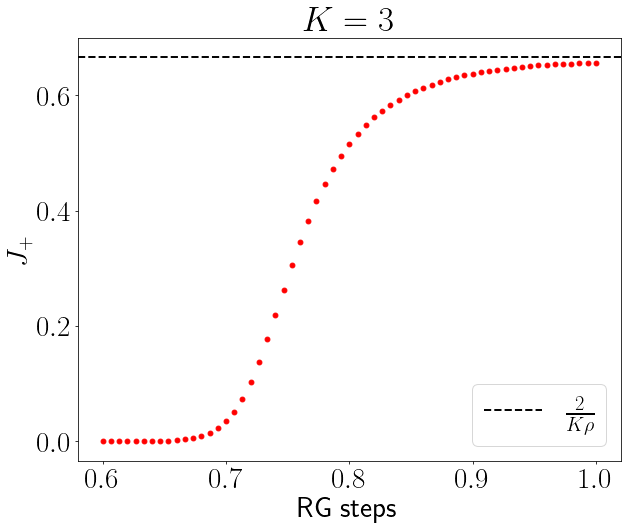

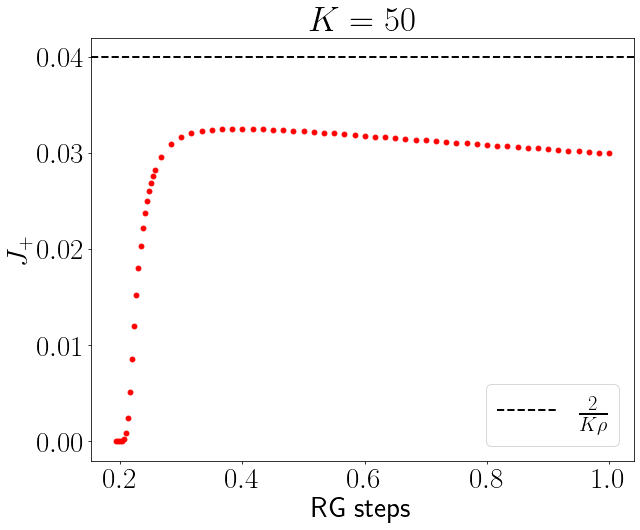

In [23]:
D0 = 15
deltaD = 0.05
rho = 1
D_range = np.arange(D0, 0, -deltaD)
for K in [3, 50]:
    Jstar = 2/(K*rho)
    plt.axhline(Jstar, 0, 1, lw=2, ls='--', color="black", label=r"$\frac{2}{K \rho}$")
    deltaJ = -0.01
    x = []
    y = []
    Jp = Jstar + deltaJ
    Jm = Jstar - deltaJ
    for Dj in D_range:
        x.append(Dj/D0)
        y.append(Jp)
        deltap = rg1(Jp,Jm,Dj,rho,K,deltaD)
        deltam = rg2(Jp,Jm,Dj,rho,K,deltaD)
        if Jp * (Jp + deltap) < 0 or  Jm * (Jm + deltam) < 0 or abs(deltap * deltam) < 1e-10:
            break
        Jp += deltap
        Jm += deltam
        
    if K < 5:
        plt.scatter(x[::2], y[::2], marker=".", color='r')
    else:
        # print (len(x))
        plt.scatter(x[:225][::5], y[:225][::5], marker=".", color='r')
        plt.scatter(x[223:], y[223:], marker=".", color='r')
    plt.xlabel("RG steps %")
    plt.ylabel(r"$J_+$")
    plt.title(r"$K={}$".format(K))
    plt.legend()
    plt.savefig("irr_Jp_K={}.pdf".format(K), bbox_inches="tight")
    plt.show()